In [1]:
import pandas as pd
import matplotlib.pyplot as plt
covid_19 = pd.read_csv("country_wise_latest.csv")
covid_19

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [2]:
clean_data_covid = covid_19.dropna()

In [5]:
Region_of_covid_affected = clean_data_covid["WHO Region"].value_counts()
Region_of_covid_affected

WHO Region
Europe                   56
Africa                   48
Americas                 35
Eastern Mediterranean    22
Western Pacific          16
South-East Asia          10
Name: count, dtype: int64

In [8]:
group_of_confrmed_region = clean_data_covid.groupby('WHO Region')['Confirmed'].sum()
group_of_confrmed_region

WHO Region
Africa                    723207
Americas                 8839286
Eastern Mediterranean    1490744
Europe                   3299523
South-East Asia          1835297
Western Pacific           292428
Name: Confirmed, dtype: int64

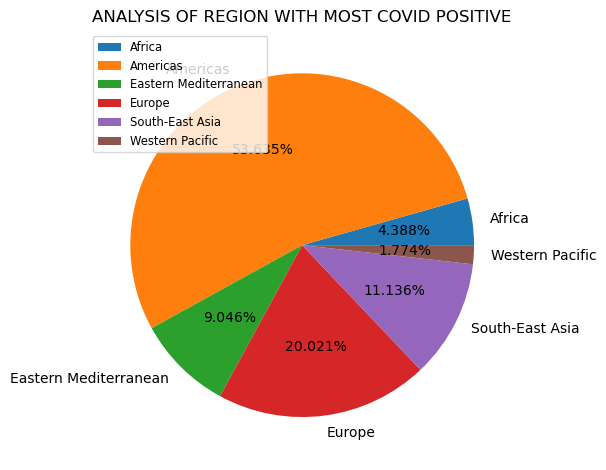

In [16]:
plt.pie(group_of_confrmed_region.values , labels =group_of_confrmed_region.index ,autopct = '%1.3f%%')
plt.legend(loc = 'upper left' ,fontsize = 'small' ,fancybox = True)
plt.title("ANALYSIS OF REGION WITH MOST COVID POSITIVE")
plt.tight_layout()
plt.show()

In [17]:
groupby_deaths_region = clean_data_covid.groupby('WHO Region')['Deaths'].sum()
groupby_deaths_region

WHO Region
Africa                    12223
Americas                 342732
Eastern Mediterranean     38339
Europe                   211144
South-East Asia           41349
Western Pacific            8249
Name: Deaths, dtype: int64

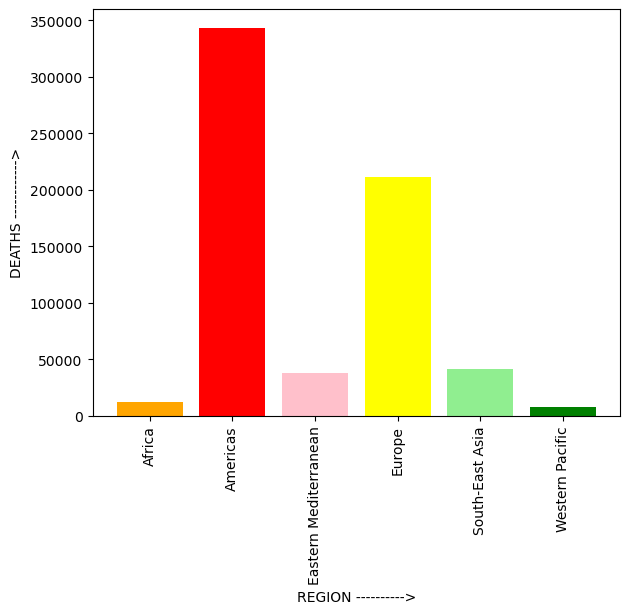

In [21]:
plt.bar(groupby_deaths_region.index ,groupby_deaths_region.values ,color = ['orange','red','pink','yellow','lightgreen','green'])
plt.xlabel("REGION ---------->")
plt.ylabel("DEATHS ------------>")
plt.tight_layout()
plt.xticks(rotation ='vertical') # or rotation=90
plt.show()

In [22]:
recover_people = clean_data_covid.groupby('WHO Region')['Recovered'].sum()
recover_people

WHO Region
Africa                    440645
Americas                 4468616
Eastern Mediterranean    1201400
Europe                   1993723
South-East Asia          1156933
Western Pacific           206770
Name: Recovered, dtype: int64

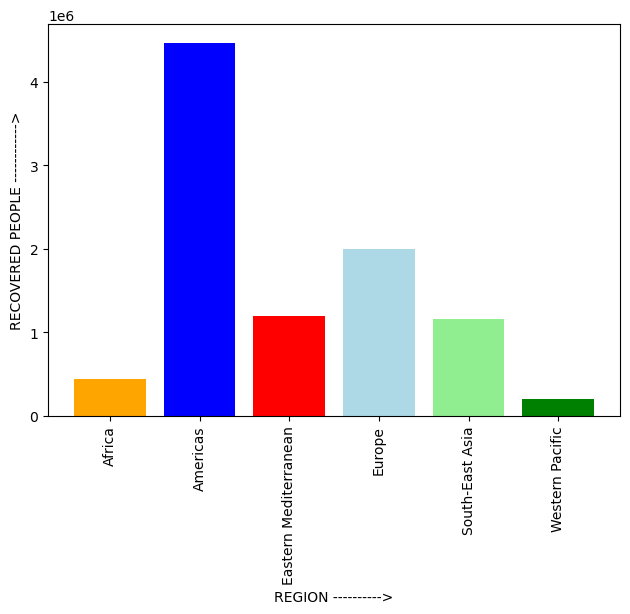

In [24]:
plt.bar(recover_people.index ,recover_people.values ,color = ['orange','blue','RED','lightblue','lightgreen','green'])
plt.xlabel("REGION ---------->")
plt.ylabel("RECOVERED PEOPLE ------------>")
plt.tight_layout()
plt.xticks(rotation ='vertical') # or rotation=90
plt.show()

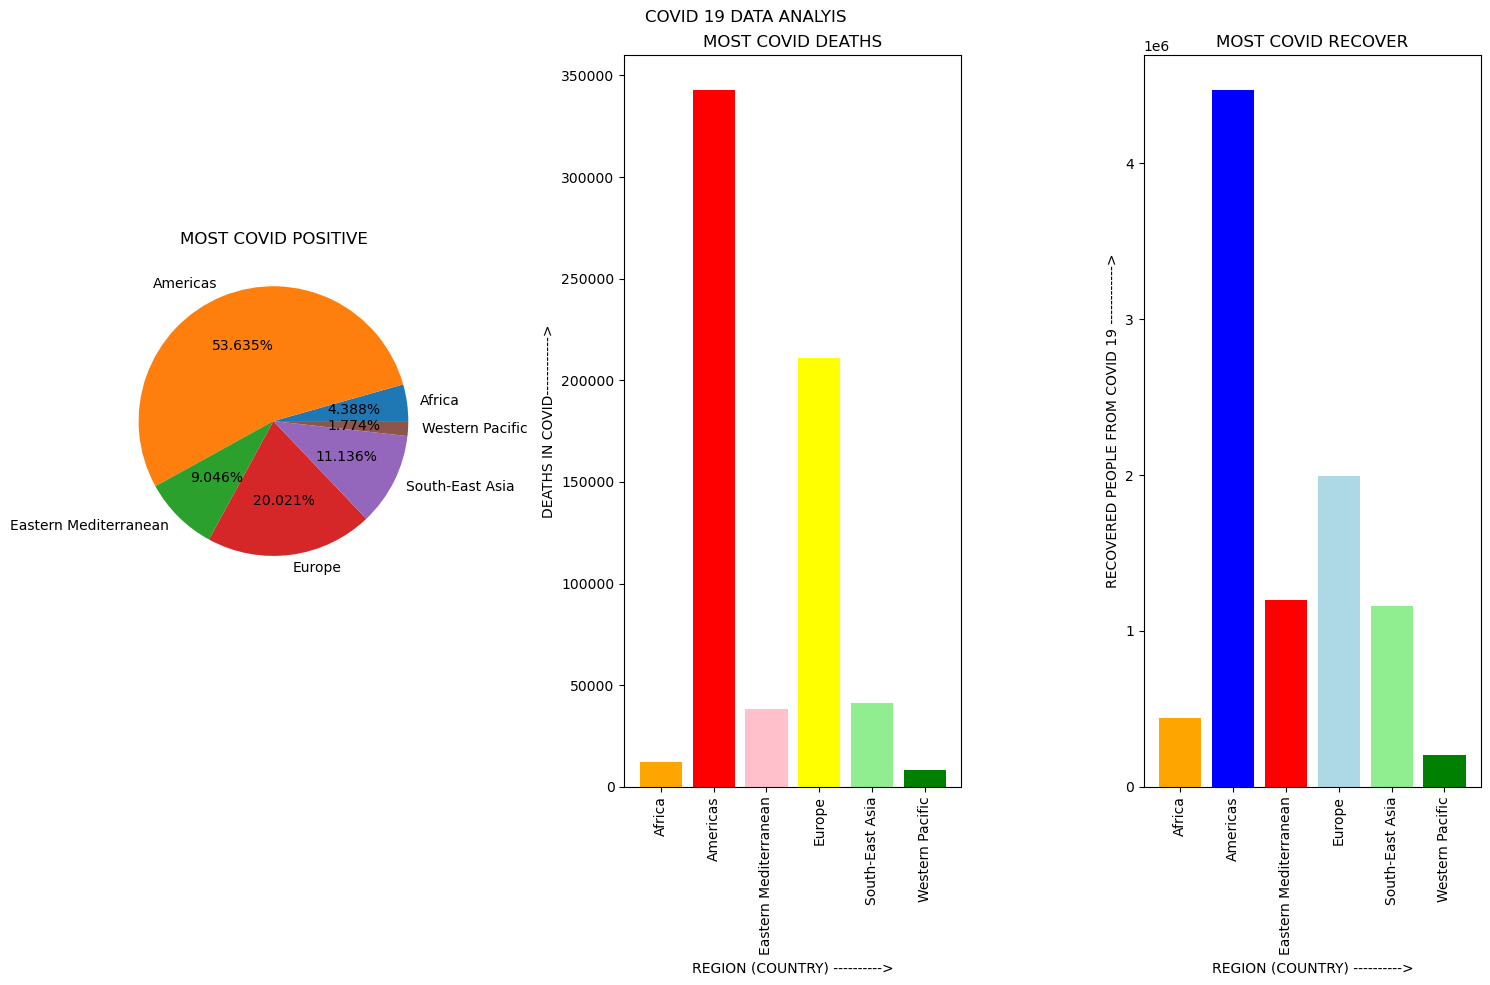

In [54]:
fig,ax= plt.subplots(1,3, figsize = (15,10))


group_of_confrmed_region = clean_data_covid.groupby('WHO Region')['Confirmed'].sum()
groupby_deaths_region = clean_data_covid.groupby('WHO Region')['Deaths'].sum()
recover_people = clean_data_covid.groupby('WHO Region')['Recovered'].sum()



ax[0].pie(group_of_confrmed_region.values , labels =group_of_confrmed_region.index ,autopct = '%1.3f%%')
# ax[0].legend(loc = 'upper left' ,fontsize = 'small' ,fancybox = True)
ax[0].set_title("MOST COVID POSITIVE")


ax[1].bar(groupby_deaths_region.index ,groupby_deaths_region.values ,color = ['orange','red','pink','yellow','lightgreen','green'])
ax[1].set_xlabel("REGION (COUNTRY) ---------->")
ax[1].set_ylabel("DEATHS IN COVID------------>")
ax[1].set_title("MOST COVID DEATHS")
ax[1].tick_params(axis='x', labelrotation=90)



ax[2].bar(recover_people.index ,recover_people.values ,color = ['orange','blue','RED','lightblue','lightgreen','green'])
ax[2].set_xlabel("REGION (COUNTRY) ---------->")
ax[2].set_ylabel("RECOVERED PEOPLE FROM COVID 19 ------------>")
ax[2].set_title("MOST COVID RECOVER")
ax[2].tick_params(axis='x', labelrotation=90)


fig.suptitle("COVID 19 DATA ANALYIS")
plt.tight_layout()
plt.savefig('COVID19.png', dpi=300,bbox_inches = 'tight')
plt.show()